<a href="https://colab.research.google.com/github/Shahzodgithub/data_science_practice/blob/main/Copy_of_ImageChecker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai==2.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 189 kB 23.2 MB/s 
     |██████████████████████████████▎ | 834.1 MB 1.2 MB/s eta 0:00:41tcmalloc: large alloc 1147494400 bytes == 0x39740000 @  0x7f3e976e1615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████████████████| 881.9 MB 1.9 kB/s 
     |████████████████████████████████| 55 kB 5.5 MB/s 
     |████████████████████████████████| 19.1 MB 67.0 MB/s 
     |████████████████████████████████| 21.0 MB 1.2 MB/s 
     |████████████████████████████████| 23.2 MB 1.4 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0+cu113
    Uninstalling torch-1.12.0+cu113:
      Successfully unins

In [2]:
import torch
import fastai
import numpy as np
import pandas  as pd

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.CAMVID_TINY)
path.ls()

#label getter
def label_getter(file):
    return path/'labels'/f'{file.stem}_P{file.suffix}';

#dls
dls = SegmentationDataLoaders.from_label_func(path,bs=8,fnames=get_image_files(path/'images'),label_func=label_getter,codes= np.loadtxt(path/'codes.txt',dtype=str));

#fine tuning
learn = unet_learner(dls, resnet34)
learn.fine_tune(12)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,2.939244,2.425735,00:04


epoch,train_loss,valid_loss,time
0,1.918547,1.638410,00:01
1,1.648563,1.268299,00:01
2,1.515503,1.324082,00:01
3,1.400193,1.204699,00:01
4,1.308072,1.047410,00:01
5,1.199514,0.897906,00:01
6,1.093647,0.835599,00:01
7,0.998448,0.790368,00:01
8,0.917819,0.770276,00:01
9,0.849890,0.756945,00:01


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


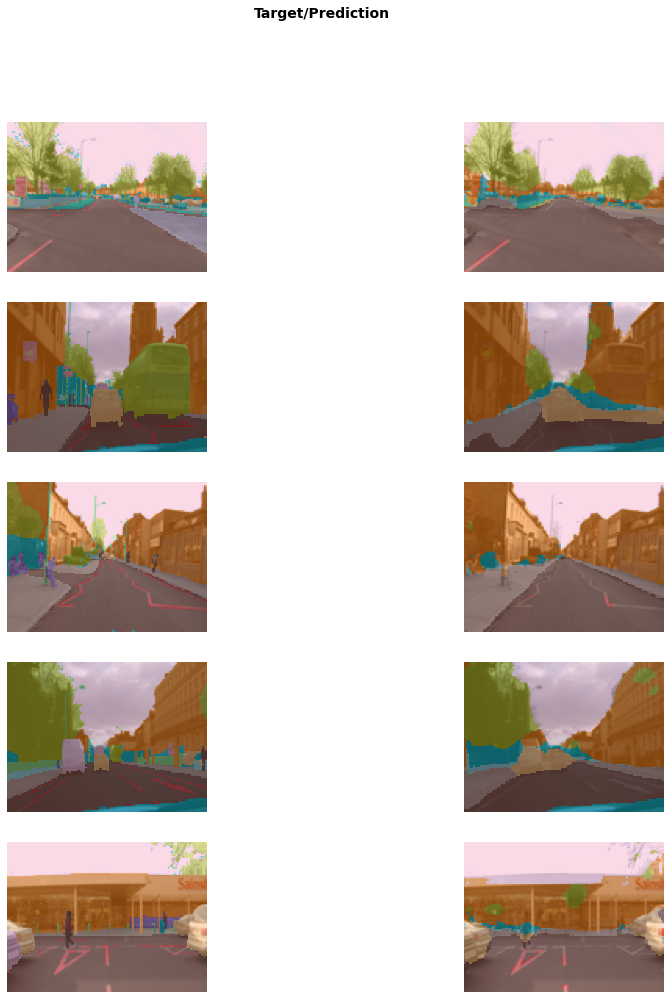

In [4]:
learn.show_results(max_n=5,figsize=(15,16))